In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 13.0 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 6.6 MB 38.6 MB/s 


In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

In [4]:
birds_df = pd.read_csv("/content/purple_martin.csv", parse_dates=['timestamp'])
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [6]:
birds_df.shape

(99, 4)

In [5]:
print("Número de diferentes pássaros presentes no dataset: {}".format(birds_df['tag-local-identifier'].nunique()))

Número de diferentes pássaros presentes no dataset: 11


In [14]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))
birds.crs = {'init':'epsg:4326'}
birds.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [11]:
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mundo.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
mundo.shape

(177, 6)

In [12]:
americas = mundo.loc[mundo['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


In [13]:
americas.shape

(31, 6)

(-30.0, 60.0)

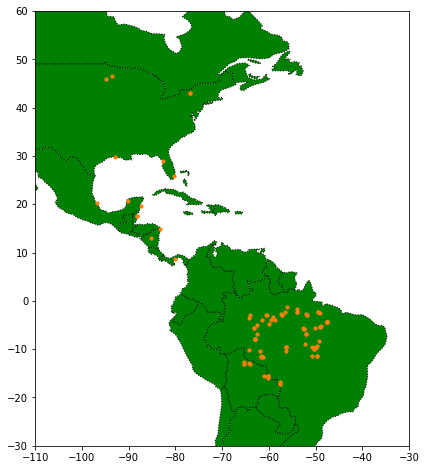

In [37]:
ax = americas.plot(figsize=(10, 8), color="green", linestyle=':', edgecolor='black')
birds.plot(ax=ax, markersize=10, color='C1')
ax.set_xlim([-110, -30])
ax.set_ylim([-30, 60])

In [19]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init':'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [20]:
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs =  {'init':'epsg:4326'}
start_gdf.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [22]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init':'epsg:4326'}
end_gdf.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)


Aqui podemos ver os caminhos que os pássaros percorrem, de onde começam e onde terminam sua jornada.

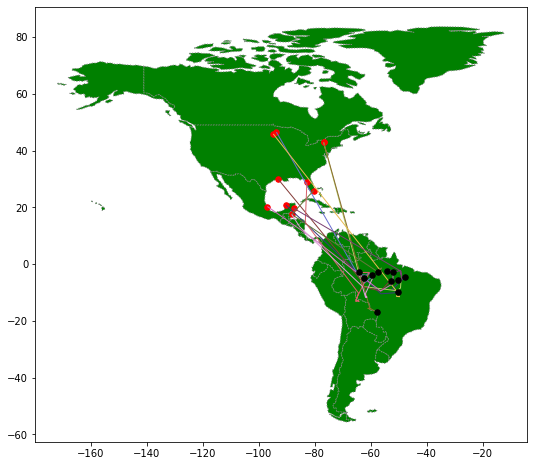

In [38]:
ax = americas.plot(figsize=(10,8), color='green', linestyle=":", edgecolor='gray')
start_gdf.plot(ax=ax, color='red', markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle="-", linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

Áreas protegidas

In [25]:
protected_areas = gpd.read_file("/content/SAPA_Aug2019-shapefile-polygons.shp")
protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,MARINE,REP_M_AREA,GIS_M_AREA,REP_AREA,GIS_AREA,NO_TAKE,NO_TK_AREA,STATUS,STATUS_YR,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,1,0.0,0.026514,0.700000,0.100194,Not Reported,0.0,Designated,1980,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,2,0.0,0.000000,0.200000,0.582439,Not Reported,0.0,Designated,0,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,1,0.0,0.000000,34.000000,35.177714,Not Reported,0.0,Designated,2000,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,0,0.0,0.000000,6035.113401,6073.960565,Not Applicable,0.0,Designated,1995,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,0,0.0,0.000000,4737.960587,4769.354411,Not Applicable,0.0,Designated,1972,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


In [26]:
protected_areas.shape

(4748, 29)

In [27]:
protected_areas.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'geometry'],
      dtype='object')

In [28]:
america_sul = americas.loc[americas['continent'] == "South America"]
america_sul.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


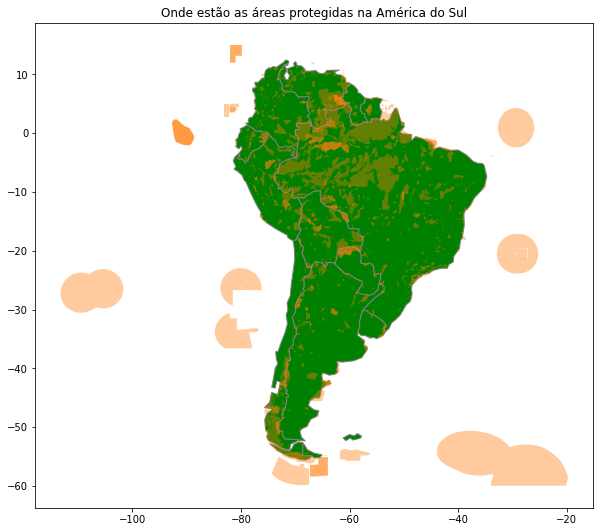

In [41]:
ax = america_sul.plot(figsize=(10,10), color='green', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4, color='C1')
plt.title("Onde estão as áreas protegidas na América do Sul")
plt.show()

Porcentagem de área protegida na América do Sul

In [30]:
p_area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("América do Sul tem {} km² de áreas protegidas".format(p_area))

América do Sul tem 5396761.9116883585 km² de áreas protegidas


In [31]:
area_total = sum(america_sul.geometry.to_crs(epsg=3035).area)/10**6
print("Área total: {}".format(area_total))

Área total: 17759005.81506123


In [32]:
porcentagem_protegida = p_area/area_total
print("Porcentagem de área protegida: {}".format(round(porcentagem_protegida*100, 2)))

Porcentagem de área protegida: 30.39


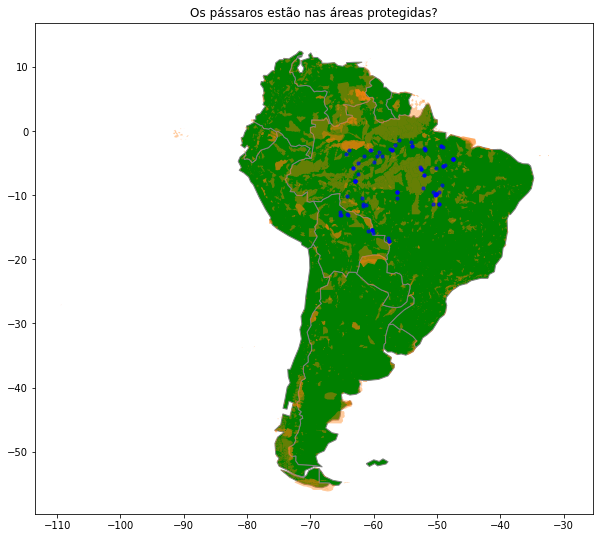

In [43]:
ax = america_sul.plot(figsize=(10,10), color='green', edgecolor='gray')
protected_areas[protected_areas['MARINE'] != '2'].plot(ax=ax, alpha=0.4, zorder=1, color='C1')
birds[birds.geometry.y < 0].plot(ax=ax, color='blue', alpha=0.6, markersize=10, zorder=2)
plt.title("Os pássaros estão nas áreas protegidas?")
plt.show()